# Question 1: Fitting natural cubic splines
$S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x-x_j)^3$.

***
Simulate data from $y = cos(x)$ for $x$ in the interval $[-\pi/2, \pi/2]$. Use equally spaced $x$ values.
***

Lets generate a set of equally spaced $x$ values in the interval $[-\pi/2, \pi/2]$. Then compute the corresponding $y$ values by evaluating $y = \cos(x)$ for each $x$.
***

Simulate data from $y = \cos(x)$ for $x$ in the interval $[−\pi/2, \pi/2]$. Use equally spaced 𝑥 values.

To simulate the data, we will generate equally spaced $x$ values in the interval 
$[−\pi/2, \pi/2]$ and compute the corresponding $y$ values using the cosine function.
***

In [33]:
import numpy as np

# Define the interval and number of data points
x_start, x_end, num_points = -np.pi/2, np.pi/2, 10 # Number of data points

# Generate equally spaced x values
x = np.linspace(x_start, x_end, num_points)

# Compute corresponding y values using the cosine function
y = np.cos(x) 

***
Set up the tri-diagonal coefficient matrix $A$ for natural cubic splines. 
***

To determine the number of data points, $n$. Lets create an $n\times n$ matrix $A$ with all elements initially set to 0. After, lets set the diagonal elements of $A$ to 2. then the sub-diagonal and super-diagonal elements of $A$ to 1.
***

In [34]:
# Determine the number of data points
n = len(x)

# Initialize coefficient matrix A
A = np.zeros((n, n))

# Diagonal elements to 2 
A += np.diag([2] * n) 

 # Sub-diagonal elements to 1
A += np.diag([1] * (n - 1), k=-1)

# Super-diagonal elements to 1
A += np.diag([1] * (n - 1), k=1)

***
Set up the $y$ vector and solve the system $Ac = y$ to obtain the $c$'s. Use `scipy linalg` to solve the system.
***

Creating a vector $y$ of length $n$, where each element is the corresponding $y$ value from step 1 and utilizing the `scipy linalg.solve` function give us the ability to solve the system of equations $Ac = y$ and obtain the vector $c$.
***

In [35]:
import scipy.linalg as linalg

# Solve the system Ac = y to obtain the c's
c = linalg.solve(A, y)

***
Solve for the other coefficients: $a$'s, $b$'s, and $d$'s.
***

Creating vectors $a$, $b$, and $d$ of length $n$, initially set to 0 and computing the $a$, $b$, and $d$ values for each spline segment using the formulas:

$$
\begin{align}
a_j  &= y_j \\
b_j &= \frac{y_{j+1} - y_j}{x_{j+1} - x_j} - \frac{c_j(x_{j+1} - x_j)^2}{3} - \frac{d_j(x_{j+1} - x_j)^3}{6} \\
d_j &= \frac{c_{j+1} - c_j}{3(x_{j+1} - x_j)}
\end{align}
$$

We solve the system of equations to obtain the $c$ values.
***

In [36]:
a, b, d = y.copy(), np.zeros(n), np.zeros(n)
for j in range(n-1):
    h = x[j+1] - x[j]
    b[j] = (y[j+1] - y[j]) / h - (c[j+1] + 2*c[j]) * h / 3  # Calculate b coefficients
    d[j] = (c[j+1] - c[j]) / (3 * h)  # Calculate d coefficients

# Print the coefficients.
for j in range(n):
    print(f"Spline {j+1}: a = {a[j]}, b = {b[j]}, c = {c[j]}, d = {d[j]}")

Spline 1: a = 6.123233995736766e-17, b = 0.9798155360510165, c = -0.07213376483528113, d = 0.20664801427253995
Spline 2: a = 0.3420201433256688, b = 0.8134463264833037, c = 0.1442675296705623, d = -0.017808178437227783
Spline 3: a = 0.6427876096865394, b = 0.5815237262571096, c = 0.12561884881982532, d = 0.11618011655726299
Spline 4: a = 0.8660254037844386, b = 0.25413614998680517, c = 0.24728238237632638, d = -0.001375664183629711
Spline 5: a = 0.984807753012208, b = -0.0858149735639176, c = 0.24584179021196048, d = 1.0601848938211721e-16
Spline 6: a = 0.984807753012208, b = -0.4262689586435726, c = 0.2458417902119606, d = 0.001375664183629553
Spline 7: a = 0.8660254037844387, b = -0.7116908116393781, c = 0.24728238237632633, d = -0.11618011655726272
Spline 8: a = 0.6427876096865395, b = -0.9076544447021211, c = 0.1256188488198255, d = 0.01780817843722751
Spline 9: a = 0.3420201433256688, b = -1.0049949700157157, c = 0.1442675296705622, d = -0.2066480142725398
Spline 10: a = 6.1232339

***
Compare the fitted coefficients with values from the scipy builtin cubic splines function for the first three splines.
***

***
Using the scipy.interpolate.CubicSpline function to fit a natural cubic spline to the simulated data, we extract the coefficients of the first three splines from the CubicSpline object. Lets compare the coefficients obtained from our spline with the coefficients from the CubicSpline object.
***

In [37]:
# Built-in cubic spline function
spline = CubicSpline(x, y)

# Extract coefficients for the first three splines
coefficients = spline.c[:, :3]

# For comparison, print the coefficients from the built-in function.
for j, coeff in enumerate(coefficients.T):
    print(f"Spline {j+1}: a = {coeff[3]}, b = {coeff[2]}, c = {coeff[1]}, d = {coeff[0]}")  # Notice the reversed order

Spline 1: a = 6.123233995736766e-17, b = 1.0025285734376974, c = -0.012961744979086351, d = -0.14927359428129927
Spline 2: a = 0.3420201433256688, b = 0.9389139638114324, c = -0.16928068736877716, d = -0.149273594281303
Spline 3: a = 0.6427876096865394, b = 0.7661681450677489, c = -0.3255996297584721, d = -0.10655383681469502


***
Plot the $cos(x)$ curve and the interpolate the values using a finner grid and your own spline code.
***

***
Generating a finer grid of $x$ values within the interval $[-\pi/2, \pi/2]$ and then evaluating the $\cos(x)$ function for each $x$ in the finer grid; we use our spline to interpolate the values of $y$ for the finer grid of $x$ values. Lets plot the $\cos(x)$ curve and the interpolated values below. 
***

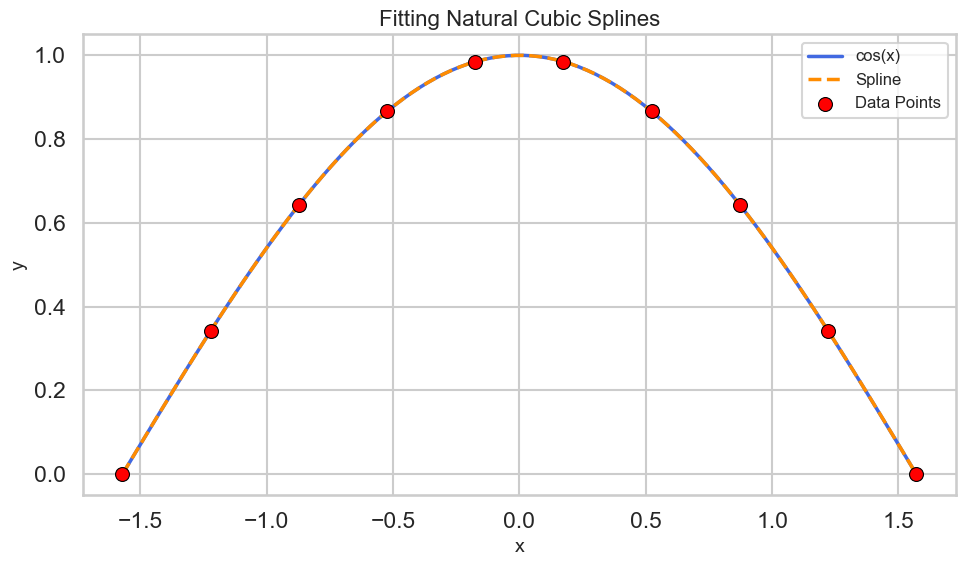

In [40]:
import seaborn as sns

# Generate a finer grid of x values
x_finer = np.linspace(x_start, x_end, 100)

# Evaluate the cosine and spline function for the finer grid
y_cosine, y_spline = np.cos(x_finer), spline(x_finer)

# Set Seaborn style
sns.set_style("whitegrid")
sns.set_context("talk")  # Set context to "talk" for better clarity in larger plots

# Create the plot
plt.figure(figsize=(10, 6))

# Plot original cosine curve with a smooth line style
sns.lineplot(x=x_finer, y=y_cosine, label='cos(x)', color='royalblue', linewidth=2.5)

# Plot spline curve
sns.lineplot(x=x_finer, y=y_spline, label='Spline', color='darkorange', linestyle='--', linewidth=2.5)
# Highlight original data points
sns.scatterplot(x=x, y=y, color='red', label='Data Points', s=100, edgecolors='black', zorder=5)


# Enhance the legend and other visual elements
plt.legend(fontsize=12)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Fitting Natural Cubic Splines', fontsize=16)

# Display the enhanced plot
plt.tight_layout()
plt.show()